### Today:
* Neural Networks
    * Neuron 
    * Arhitecture
    * Activation functions
    * Cost function
    * Feed-forward
    * Backpropagation
  
### Resources:
* Neural Networks: http://neuralnetworksanddeeplearning.com/
* Neural Networks: http://karpathy.github.io/neuralnets/
* Neural Networks: http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/

https://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/

In [4]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets("../../data/05_kNN/MNIST_data/", one_hot=True)

Extracting ../../data/05_kNN/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-labels-idx1-ubyte.gz


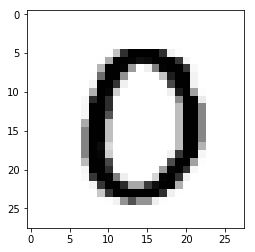

In [6]:
image = mnist.train.images[10].reshape((28, 28))
plt.imshow(image, cmap='Greys')

In [52]:
n_features = 784        # MNIST data input (img shape: 28*28)
n_labels = 10           # MNIST total classes (0-9 digits)
learning_rate = 0.5
iterations = 2000

In [53]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_labels])

# Model parameters
W = tf.Variable(tf.random_normal([n_features, n_labels]))
b = tf.Variable(tf.random_normal([n_labels]))

In [54]:
# Neural network
hypothesis = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

In [55]:
# Cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), reduction_indices=[1]))

In [56]:
# Prediction
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [57]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [58]:
with tf.Session() as sess:
    
    sess.run(tf.initialize_all_variables())
    
    for step in range(iterations):
        
        batch_xs, batch_ys = mnist.train.next_batch(100)
        
        sess.run(train_step, feed_dict={X: batch_xs, y: batch_ys})
        
        if (step % 100) == 0:
            print(step, sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))
    
    print(iterations, sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

0 0.1143
100 0.7447
200 0.8059
300 0.8357
400 0.8459
500 0.8549
600 0.8637
700 0.8711
800 0.8701
900 0.8712
1000 0.8768
1100 0.881
1200 0.8875
1300 0.8842
1400 0.8871
1500 0.89
1600 0.8912
1700 0.8883
1800 0.8935
1900 0.8927
2000 0.8926


In [59]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch: 0001 cost=341.882086286
Epoch: 0002 cost=99.498621944
Epoch: 0003 cost=73.752815736
Epoch: 0004 cost=59.628556610
Epoch: 0005 cost=49.453289975
Epoch: 0006 cost=43.802042105
Epoch: 0007 cost=38.559764022
Epoch: 0008 cost=34.596790018
Epoch: 0009 cost=31.885243859
Epoch: 0010 cost=29.095908964
Epoch: 0011 cost=26.805818067
Epoch: 0012 cost=25.005075455
Epo